In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import segmentation_models_pytorch as smp

from src.datasets.DubaiSemanticSegmentationDataset import (
    DubaiSemanticSegmentationDataset,
)

from src.datasets.utils.ResizeToDivisibleBy32 import ResizeToDivisibleBy32

In [4]:
DUBAI_DATASET_PATH = "data/DubaiSemanticSegmentationDataset"

In [8]:
example_dataset = DubaiSemanticSegmentationDataset(
    DUBAI_DATASET_PATH, transforms=[ResizeToDivisibleBy32()]
)
print(len(example_dataset))

72


In [9]:
example_loader = DataLoader(example_dataset, batch_size=1, shuffle=True)

In [10]:
for images, masks in example_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([1, 3, 1504, 2176])
torch.Size([1, 3, 1504, 2176])


In [11]:
to_pil_transform = transforms.ToPILImage()
img = to_pil_transform(images.squeeze())

In [12]:
# img.show()

In [13]:
msk = to_pil_transform(masks.squeeze())

In [14]:
# msk.show()

In [15]:
model = smp.Unet(
    encoder_name="resnet34",  # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",  # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=6,  # model output channels (number of classes in your dataset)
)

In [42]:
import numpy as np

model.eval()

with torch.no_grad():
    for images, masks in example_loader:

        height = images.shape[2]
        width = images.shape[3]

        if height % 32 == 0 and width % 32 == 0:
            print("Height and width are divisible by 32")
        else:
            print("Height and width are not divisible by 32")

        output = model(images)
        output = torch.softmax(output, dim=1)
        class_output = torch.argmax(output, dim=1)

        print("output")
        print(type(output))
        print(output.shape)
        print(output.max())
        print(output.min())
        print()
        print("masks")
        print(type(masks))
        print(masks.shape)
        print(masks.max())
        print(masks.min())

        images = to_pil_transform(images.squeeze())
        # images.show()
        images_array = np.array(images)

        # Show the images using matplotlib
        # plt.imshow(images_array, cmap='gray')
        # plt.axis('off')

        # output = to_pil_transform(output.squeeze())
        # output.show()
        output_array = np.array(output.squeeze())

        # Show the output using matplotlib
        # plt.figure()
        # plt.imshow(output_array, cmap='gray')
        # plt.axis('off')
        # plt.show()

        class_output_array = np.array(class_output.squeeze())

        masks = to_pil_transform(masks.squeeze())
        # masks.show()
        # Convert the PIL Image to a numpy array
        mask_array = np.array(msk)

        # Show the mask using matplotlib
        # plt.imshow(mask_array, cmap='gray')
        # plt.axis('off')
        # plt.show()

        # tp, fp, fn, tn = smp.metrics.get_stats(
        #     output, masks, mode="multilabel", threshold=0.5
        # )
        # print(f"TP: {tp}")
        # print(f"FP: {fp}")
        # print(f"TN: {tn}")
        # print(f"FN: {fn}")

        # iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        # print(f"IoU score: {iou_score}")

        break

Height and width are divisible by 32
output
<class 'torch.Tensor'>
torch.Size([1, 6, 1504, 2176])
tensor(0.7019)
tensor(0.0090)

masks
<class 'torch.Tensor'>
torch.Size([1, 3, 1504, 2176])
tensor(0.9961)
tensor(0.0627)


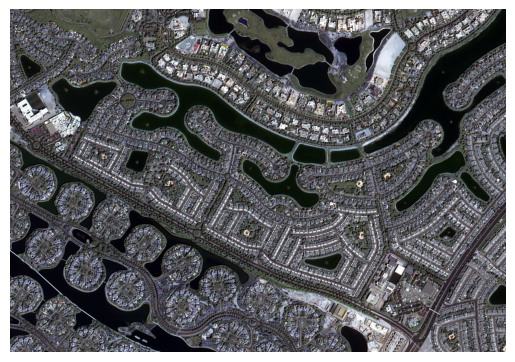

In [43]:
plt.imshow(images_array, cmap="gray")
plt.axis("off")
plt.show()

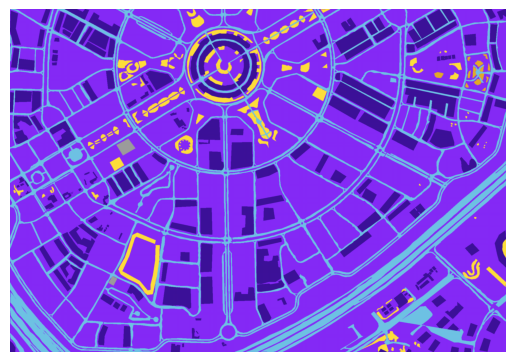

In [44]:
plt.imshow(mask_array, cmap="gray")
plt.axis("off")
plt.show()

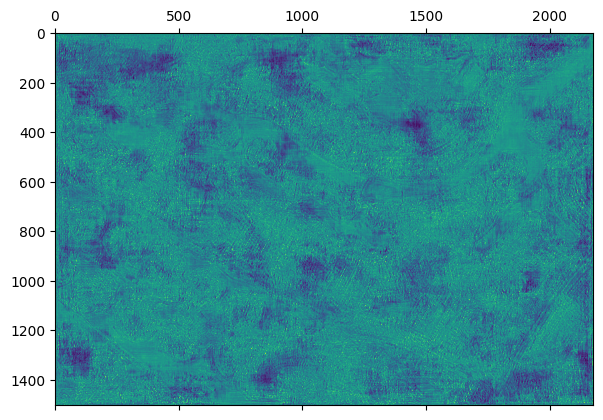

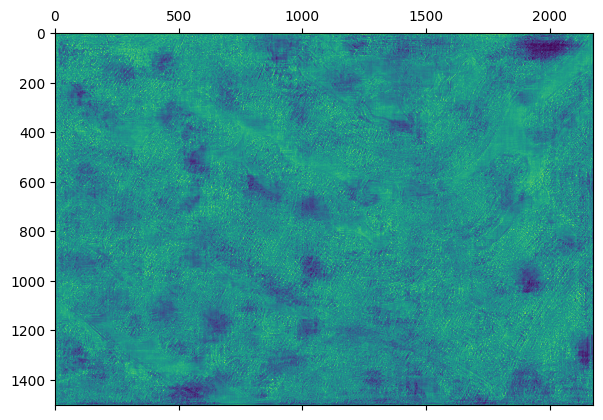

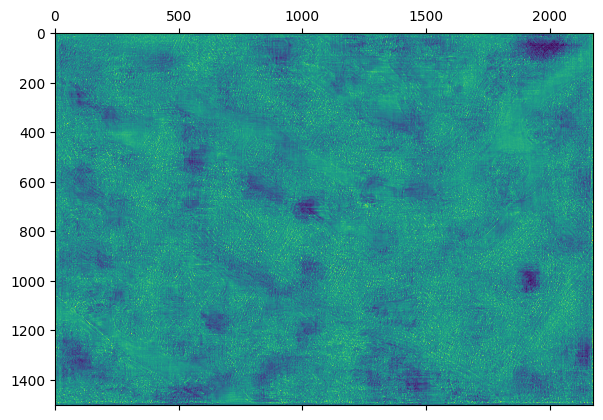

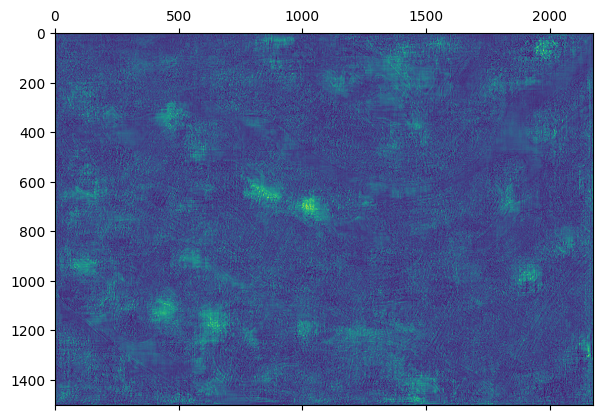

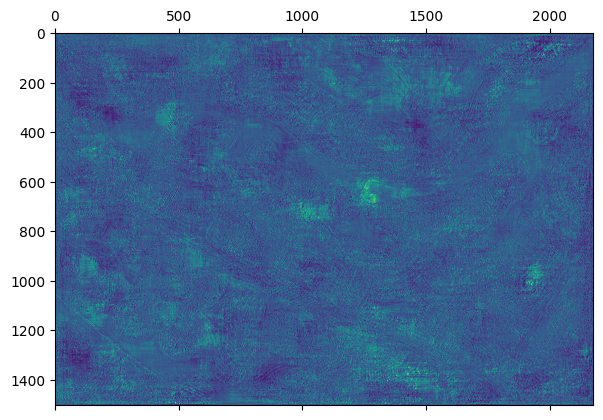

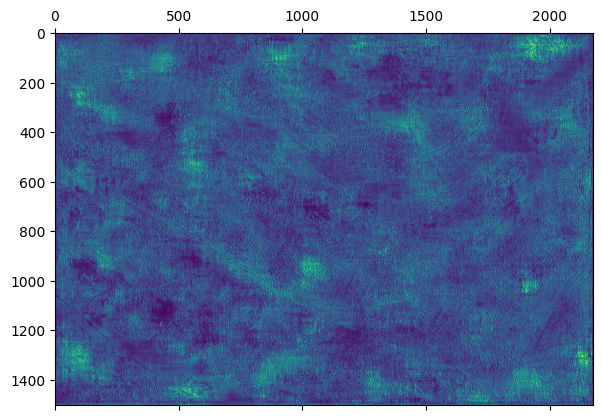

In [45]:
# plt.imshow(output_array, cmap='gray')
# plt.axis('off')
# plt.show()
plt.matshow(output_array[0, :, :])
plt.matshow(output_array[1, :, :])
plt.matshow(output_array[2, :, :])
plt.matshow(output_array[3, :, :])
plt.matshow(output_array[4, :, :])
plt.matshow(output_array[5, :, :])

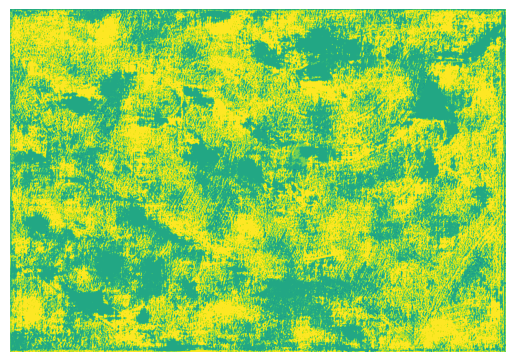

In [48]:
plt.imshow(class_output_array, cmap="viridis")
plt.axis("off")
plt.show()

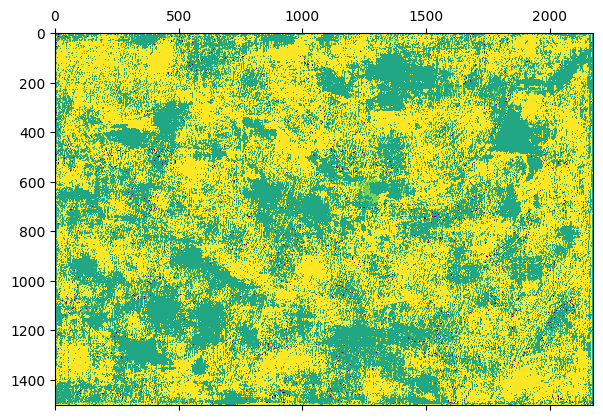

In [49]:
plt.matshow(class_output_array)

In [58]:
class_output_array

array([[3, 3, 3, ..., 3, 4, 3],
       [3, 3, 3, ..., 3, 4, 4],
       [3, 3, 3, ..., 5, 4, 4],
       ...,
       [5, 3, 3, ..., 5, 5, 4],
       [5, 3, 5, ..., 2, 0, 3],
       [5, 5, 5, ..., 5, 0, 5]], dtype=int64)

In [59]:
class_output_array.max()

5

In [60]:
class_output_array.min()

0

In [65]:
unique, counts = np.unique(class_output_array, return_counts=True)
print(dict(zip(unique, counts)))

Distinct values: [0 1 2 3 4 5]
Count: 6


In [55]:
visualization_df = pd.DataFrame(class_output_array)
print(visualization_df.head())

   0     1     2     3     4     5     6     7     8     9     ...  2166  \
0     3     3     3     3     3     3     3     3     3     3  ...     3   
1     3     3     3     3     3     3     3     3     3     3  ...     5   
2     3     3     3     3     3     3     3     3     3     3  ...     5   
3     3     3     3     3     3     3     3     3     3     3  ...     3   
4     3     3     3     3     3     3     3     3     3     3  ...     3   

   2167  2168  2169  2170  2171  2172  2173  2174  2175  
0     3     3     3     3     3     3     3     4     3  
1     5     3     3     3     3     3     3     4     4  
2     5     5     3     3     3     4     5     4     4  
3     3     3     3     3     3     3     5     4     4  
4     3     3     3     3     3     0     5     5     4  

[5 rows x 2176 columns]


In [56]:
visualization_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Columns: 2176 entries, 0 to 2175
dtypes: int64(2176)
memory usage: 25.0 MB


In [57]:
visualization_df.describe()

0            1            2            3            4     \
count  1504.000000  1504.000000  1504.000000  1504.000000  1504.000000   
mean      4.886303     3.445479     3.448138     3.170213     3.083777   
std       0.473909     0.701452     0.841360     0.680703     0.543175   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     3.000000     3.000000     3.000000     3.000000   
50%       5.000000     3.000000     3.000000     3.000000     3.000000   
75%       5.000000     4.000000     3.000000     3.000000     3.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              5            6            7            8            9     ...  \
count  1504.000000  1504.000000  1504.000000  1504.000000  1504.000000  ...   
mean      3.136303     3.523271     3.816489     4.077128     4.271277  ...   
std       0.678075     0.952353     1.098402     1.021738     0.969707  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       3.000000     3.000000     3.000000     3.000000     3.000000  ...   
50%       3.000000     3.000000     3.000000     5.000000     5.000000  ...   
75%       3.000000     5.000000     5.000000     5.000000     5.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

              2166         2167         2168         2169         2170  \
count  1504.000000  1504.000000  1504.000000  1504.000000  1504.000000   
mean      4.266622     3.636968     3.176862     3.003989     2.950798   
std       1.027915     0.943439     0.565682     0.386030     0.798518   
min       0.000000     0.000000     2.000000     0.000000     0.000000   
25%       3.000000     3.000000     3.000000     3.000000     3.000000   
50%       5.000000     3.000000     3.000000     3.000000     3.000000   
75%       5.000000     5.000000     3.000000     3.000000     3.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              2171         2172         2173         2174         2175  
count  1504.000000  1504.000000  1504.000000  1504.000000  1504.000000  
mean      3.166888     3.476064     4.652926     4.435505     3.625000  
std       1.241635     1.645401     0.502043     1.130754     0.704751  
min       0.000000     0.000000     2.000000     0.000000     0.000000  
25%       3.000000     4.000000     4.000000     4.000000     3.000000  
50%       3.000000     4.000000     5.000000     5.000000     4.000000  
75%       4.000000     4.000000     5.000000     5.000000     4.000000  
max       5.000000     5.000000     5.000000     5.000000     5.000000  

[8 rows x 2176 columns]